In [5]:
pip install psycopg2-binary

     |████████████████████████████████| 2.9 MB 4.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import config as cfg
from sqlalchemy import create_engine

In [76]:
connection_string = 'postgresql://postgres:' + cfg.dbpassword + '@localhost:5432/' + cfg.dbname
engine = create_engine(connection_string)
connection = engine.connect()

In [77]:
salaries_df = pd.read_sql("SELECT * FROM emp.salaries", con=engine)
salaries_df.head()

,id_salary,emp_no,salary,from_date,to_date
0,1,10001,60117.0,1986-06-26,1987-06-26
1,2,10002,65828.0,1996-08-03,1997-08-03
2,3,10003,40006.0,1995-12-03,1996-12-02
3,4,10004,40054.0,1986-12-01,1987-12-01
4,5,10005,78228.0,1989-09-12,1990-09-12


Text(0, 0.5, 'frequency')

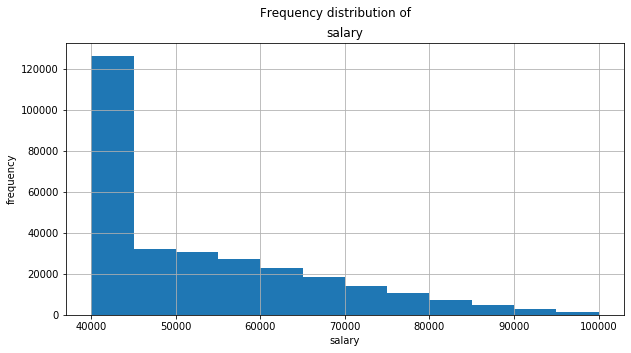

In [78]:
bins = [40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000]
salaries_df.hist(column = 'salary', bins = bins, figsize=(10,5))
plt.suptitle("Frequency distribution of")
plt.xlabel("salary")
plt.ylabel("frequency")

In [79]:
sqlstring = ("SELECT b.title, AVG(a.salary) as av_salary FROM emp.salaries as a "
            "INNER JOIN emp.titles as b "
            "ON a.emp_no = b.emp_no "
            "GROUP BY b.title "
            )
av_salary = pd.read_sql(sqlstring, con=engine)

av_salary.head()

,title,av_salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614


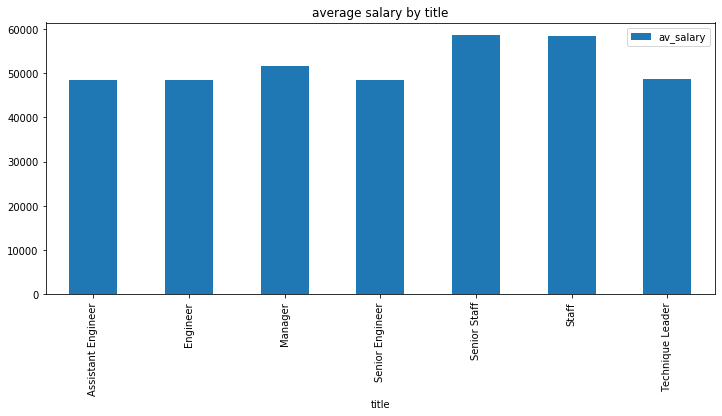

In [80]:
av_salary.plot(kind="bar", figsize=(12,5), x = 'title', y = 'av_salary',
              title = 'average salary by title')